In [2]:
import pandas as pd   
import numpy as np 

#  get_dummies() 

In [3]:
df = pd.DataFrame({"key": list("bbacab"), "data1": range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


To convert categorical variables of a Series into a “dummy”

In [4]:
pd.get_dummies(df['key'])

,a,b,c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


In [5]:
df['key'].str.get_dummies()

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


prefix adds a prefix to the the column names which is useful for merging the result with the original

In [6]:
dummies = pd.get_dummies(df['key'] , prefix="Raghav")
dummies

,Raghav_a,Raghav_b,Raghav_c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


#  Working with text data

In [7]:
pd.Series(["a", "b", "c"])

0    a
1    b
2    c
dtype: object

In [8]:
pd.Series(['A','B','C'],dtype='string')

0    A
1    B
2    C
dtype: string

Convert the integer series into string 

In [9]:
s1 = pd.Series([1,2,np.nan], dtype="Int64")
s1

0       1
1       2
2    <NA>
dtype: Int64

In [10]:
s2 = s1.astype('string')
s2

0       1
1       2
2    <NA>
dtype: string

In [11]:
s = pd.Series(["a", None, "b"], dtype="string")
s

0       a
1    <NA>
2       b
dtype: string

In [12]:
s.str.count("a")

0       1
1    <NA>
2       0
dtype: Int64

In [13]:
s.dropna().str.count("a")

0    1
2    0
dtype: Int64

# String methods

In [14]:
s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)

s

0       A
1       B
2       C
3    Aaba
4    Baca
5    <NA>
6    CABA
7     dog
8     cat
dtype: string

To convert the string into lower case 

In [15]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8     cat
dtype: string

To convert upper case 

In [16]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5    <NA>
6    CABA
7     DOG
8     CAT
dtype: string

 length of string 

In [17]:
s.str.len()

0       1
1       1
2       1
3       4
4       4
5    <NA>
6       4
7       3
8       3
dtype: Int64

# Splitting and replacing strings

In [18]:
s2 = pd.Series(["a_b_c", "c_d_e", np.nan, "r_a_g_h_a_v"], dtype="string")
s2

0          a_b_c
1          c_d_e
2           <NA>
3    r_a_g_h_a_v
dtype: string

In [19]:
s2.str.split("_")

0             [a, b, c]
1             [c, d, e]
2                  <NA>
3    [r, a, g, h, a, v]
dtype: object

Elements in the split lists can be accessed using get or [] notation:

In [20]:
s2.str.split("_").get(1)

['c', 'd', 'e']

In [21]:
s2.str.split("_").str[2]

0       c
1       e
2    <NA>
3       g
dtype: object

It is easy to expand this to return a DataFrame using expand

In [22]:
s2.str.split("_", expand=True)

,0,1,2,3,4,5
0,a,b,c,<NA>,<NA>,<NA>
1,c,d,e,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,r,a,g,h,a,v


replace optionally uses regular expressions:

In [23]:
s3 = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", "", np.nan, "CABA", "dog", "cat"],
    dtype="string",
)
s3

0       A
1       B
2       C
3    Aaba
4    Baca
5        
6    <NA>
7    CABA
8     dog
9     cat
dtype: string

In [24]:
s3.str.replace("^.a|dog","R",case=False ,regex=True)

0       A
1       B
2       C
3     Rba
4     Rca
5        
6    <NA>
7     RBA
8       R
9      Rt
dtype: string

#  Concatenation

Concatenating a single Series into a string

In [25]:
s = pd.Series(["a", "b", "c", "d"], dtype="string")
s.str.cat(sep=" , ")


'a , b , c , d'

In [26]:
s.str.cat()

'abcd'

By default, missing values are ignored. Using na_rep, they can be given a representation

In [27]:
t = pd.Series(["a", "b", np.nan, "d"], dtype="string")
t

0       a
1       b
2    <NA>
3       d
dtype: string

In [28]:

t.str.cat(sep=",")


'a,b,d'

In [29]:
t.str.cat(sep=",", na_rep="-")

'a,b,-,d'

# Concatenating a Series and something list-like into a Series

In [30]:
s

0    a
1    b
2    c
3    d
dtype: string

In [31]:
s.str.cat(['A','B','C','D'])

0    aA
1    bB
2    cC
3    dD
dtype: string

In [32]:
t,s

(0       a
 1       b
 2    <NA>
 3       d
 dtype: string,
 0    a
 1    b
 2    c
 3    d
 dtype: string)

Concatenating a Series and something array-like into a Series

In [33]:
d = pd.concat([t,s ], axis=1)
d

,0,1
0,a,a
1,b,b
2,<NA>,c
3,d,d


In [34]:
s.str.cat(d , na_rep='_')

0    aaa
1    bbb
2    c_c
3    ddd
dtype: string

# Extract all matches in each subject (extractall)

In [35]:
s = pd.Series(["a1a2", "b1", "c1"], index=["A", "B", "C"], dtype="string") 
s


A    a1a2
B      b1
C      c1
dtype: string

In [36]:
two_groups = "(?P<letter>[a-z])(?P<digit>[0-9])"


In [37]:
s.str.extract(two_groups, expand=True)

,letter,digit
A,a,1
B,b,1
C,c,1


In [38]:
s.str.extractall(two_groups)

letter digit
  match             
A 0          a     1
  1          a     2
B 0          b     1
C 0          c     1

#  Testing for strings that match or contain a pattern

In [39]:
pattern = r"[0-9][a-z]"

In [40]:
pd.Series(
    ["1", "2", "3a", "3b", "03c", "4dx"],
    dtype="string",
).str.contains(pattern)

0    False
1    False
2     True
3     True
4     True
5     True
dtype: boolean

In [41]:
pd.Series(
    ["1", "2", "3a", "3b", "03c", "4dx"],
    dtype="string",
).str.fullmatch(pattern)

0    False
1    False
2     True
3     True
4    False
5    False
dtype: boolean

# Working with missing data

In [42]:
pd.Series([1, 2], dtype=np.int64).reindex([0, 1, 2])

0    1.0
1    2.0
2    NaN
dtype: float64

In [43]:
pd.Series([True, False], dtype=np.bool_).reindex([0, 1, 2])

0     True
1    False
2      NaN
dtype: object

In [44]:
s = pd.Series([1, 2, None], dtype="Int64") 
s

0       1
1       2
2    <NA>
dtype: Int64

In [45]:
s[2]

<NA>

In [46]:
s[2] is pd.NA

True

# Inserting missing data

You can insert missing values by simply assigning to a Series or DataFrame. The missing value sentinel used will be chosen based on the dtype.

In [47]:
ser = pd.Series([1., 2., 3.])
ser

0    1.0
1    2.0
2    3.0
dtype: float64

In [48]:
ser.loc[0] = None

In [49]:
ser

0    NaN
1    2.0
2    3.0
dtype: float64

In [50]:
ser = pd.Series([pd.Timestamp("2025"), pd.Timestamp("2025")])
ser

0   2025-01-01
1   2025-01-01
dtype: datetime64[ns]

In [51]:
ser.iloc[0] = None

In [52]:
ser

0          NaT
1   2025-01-01
dtype: datetime64[ns]

# Dropping missing data

In [53]:
df = pd.DataFrame([[np.nan, 1, 2], [1, 2, np.nan], [1, 2, 3]])
df

,0,1,2
0,NaN,1,2.0
1,1.0,2,NaN
2,1.0,2,3.0


In [54]:
df.dropna()

,0,1,2
2,1.0,2,3.0


In [55]:
df.dropna(axis=1)

,1
0,1
1,2
2,2


# Filling missing data

In [56]:
data = {"np": [1.0, np.nan, np.nan, 2], "arrow": pd.array([1.0, pd.NA, pd.NA, 2]) } 
data

{'np': [1.0, nan, nan, 2],
 'arrow': <FloatingArray>
 [1.0, <NA>, <NA>, 2.0]
 Length: 4, dtype: Float64}

In [57]:

df = pd.DataFrame(data)
df


,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,NaN,<NA>
3,2.0,2.0


Fill the missing values with 0

In [58]:
df.fillna(0)  

,np,arrow
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,2.0,2.0


Fill gaps forward or backward

In [80]:
df.ffill()

,A,B
0,1.0,0.25
1,2.1,0.25
2,2.1,0.25
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [60]:
df.bfill()

,np,arrow
0,1.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0


#  Interpolation

In [62]:
df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)

df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [63]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [72]:
idx = pd.date_range("2025-05-09", periods=10, freq="D")
data = np.random.rand(10).astype(np.float64)

ts = pd.Series(data, index=idx)
ts.iloc[[1, 2, 5, 6, 9]] = np.nan
ts


2025-05-09    0.216663
2025-05-10         NaN
2025-05-11         NaN
2025-05-12    0.284466
2025-05-13    0.820418
2025-05-14         NaN
2025-05-15         NaN
2025-05-16    0.943099
2025-05-17    0.598079
2025-05-18         NaN
Freq: D, dtype: float64


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
     ---------------------------------------- 0.1/8.1 MB 1.3 MB/s eta 0:00:07
      --------------------------------------- 0.2/8.1 MB 1.8 MB/s eta 0:00:05
     - -------------------------------------- 0.3/8.1 MB 2.3 MB/s eta 0:00:04
     - -------------------------------------- 0.3/8.1 MB 1.8 MB/s eta 0:00:05
     - -------------------------------------- 0.3/8.1 MB 1.8 MB/s eta 0:00:05
     - -------------------------------------- 0.4/8.1 MB 1.5 MB/s eta 0:00:06
     -- ------------------------------------- 0.4/8.1 MB 1.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.5/8.1 MB 1.3 MB/s eta 0:00:06
     -- ------------------------------------- 0.5/8.1 MB 1.2 MB/s eta 0:00:07
     -- ------------------------------------- 0.5/8.1 MB 1.1 MB/s eta 0:00:07
     -- ------------------------------------- 0.5/8.1 MB 1.1 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/8.1 MB 1.1 MB/s eta 0

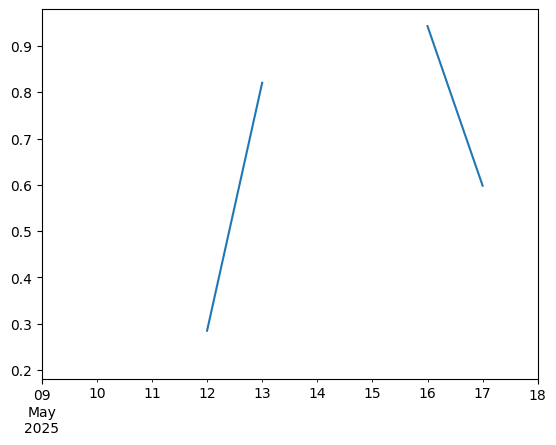

In [77]:
%pip install matplotlib

import matplotlib.pyplot as plt

ts.plot()
plt.show()

In [78]:
ts.interpolate()

2025-05-09    0.216663
2025-05-10    0.239264
2025-05-11    0.261865
2025-05-12    0.284466
2025-05-13    0.820418
2025-05-14    0.861311
2025-05-15    0.902205
2025-05-16    0.943099
2025-05-17    0.598079
2025-05-18    0.598079
Freq: D, dtype: float64

<Axes: >

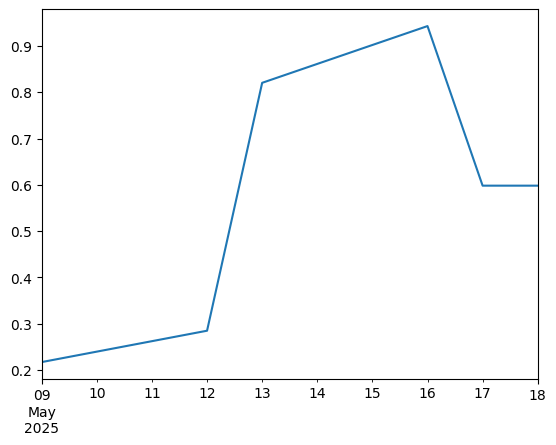

In [79]:
ts.interpolate().plot()